In [3]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from matplotlib import gridspec
from NFW_Z import NFW_Z

## NOTE: The following code uses the ENCLOSED density within spherical shells.

In [4]:
class AvDensProf:
    
    
    def __init__(self, Mv, cosmo):
        
        """Initiate the class with a known virial mass of the halo.
        Input: virial mass in solar masses."""
        
        self.Mvir = Mv


    def find_dens_profile(self, raw_radius_data, radius_array, mass_per_particle, bin_size):
        
        """Derive an AVERAGE dark matter density profile from raw data.
        Inputs:
        1) raw_radius_data: array of the radii at which dark matter particles are found, based on provided data.
        2) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        3) mass_per_particle: this is pretty self-explanatory (in solar masses)
        4) bin_size: integer that best matches the image resolution.
        Output: density_profile (the AVERAGE dark matter density profile of the data)"""
        
        density_profile = np.zeros(np.size(radius_array))
        i = 0
        for radius_value in radius_array: # enclosed density
            # particles = np.where((raw_radius_data < (radius_value + bin_size)))
            particles = np.where((raw_radius_data < (radius_value)))
            how_many_particles = np.size(particles)
            shell_volume = 4/3*np.pi*((radius_value)**3)
            density_profile[i] = how_many_particles / shell_volume * mass_per_particle
            i += 1
        return density_profile
        
    
    def deriving_r_rho_delta(self, rho_crit, delta_vir, raw_radius_data, radius_array, mass_per_particle, bin_size):
        
        """Using the density profile array, this function finds the value on the array that best
        matches a density equal to the critical density times delta_vir on the density array. 
        Inputs:
        1) rho_delta: the critical density in this specific case.
        Output: r_rho_delta (the radius where the density best matches 200 times rho_crit)"""
        
        # extract the density profile array from find_dens_profile
        density_profile = self.find_dens_profile(raw_radius_data, radius_array, mass_per_particle, bin_size)
        
        # use the extended radius array to make an extended density profile
        variation = np.abs(density_profile - rho_crit*delta_vir)
        smallest_variation = variation.argmin()
        rad_rhodelta = radius_array[smallest_variation]
        return rad_rhodelta
    
    
    def deriving_r200(self, rho_crit, raw_radius_data, radius_array, mass_per_particle, bin_size):
        
        """Using the density profile array, this function finds the value on the array that best
        matches a density equal to 200 times the critical density on the density array. 
        Inputs:
        1) rho_crit: the critical density in this specific case.
        Output: rad200 (the radius where the density best matches 200 times rho_crit)"""
        
        # extract the density profile array from find_dens_profile
        density_profile = self.find_dens_profile(raw_radius_data, radius_array, mass_per_particle, bin_size)
        
        # use the extended radius array to make an extended density profile
        deviation = np.abs(density_profile - rho_crit*200)
        least_difference_index = deviation.argmin()
        rad200 = radius_array[least_difference_index]
        return rad200
        
        
    def deriving_r_RDO(self, rho_crit, raw_radius_data, radius_array, mass_per_particle, bin_size):

        """Using the density profile array, this function finds the value on the array that best
        matches a density equal to 200 times the critical density on the density array. 
        Inputs:
        1) rho_crit: the critical density in this specific case.
        Output: rad200 (the radius where the density best matches 200 times rho_crit)"""
        
        # extract the density profile array from find_dens_profile
        density_profile = self.find_dens_profile(raw_radius_data, radius_array, mass_per_particle, bin_size)
        
        # use the extended radius array to make an extended density profile
        difference = abs(density_profile - rho_delta_omega)
        smallest_diff_index = difference.argmin()
        rad_rdo = radius_array[smallest_diff_index]
        return rad_rdo
        
        
    def final_plot(self, starting_radius, bin_size, raw_radius_data, radius_array, quoted_Mvir, \
                   quoted_Rvir, rho_crit, delta_vir, rho_delta, rho_delta_omega, mass_per_particle):
        
        """This function generates the final plot, with the AVERAGE density profile based on provided data,
        the EXTENDED density profile, as well as two pairs of similarly colored horizontal and vertical lines.
        Inputs:
        1) starting_radius: where to begin the radius array. Unit: kpc
        2) bin_size: how big each increment is between two elements of the radius array. Unit: kpc
        3) raw_radius_data: array of the radii at which dark matter particles are found, based on provided data.
        4) radius_array: array of the radii of imaginary spherical shells centered on the galactic center.
        5) upper_limit_guess: where to end the radius array. Unit: kpc
        6) quoted_Rvir: the virial radius quoted in the data. Unit: kpc
        7) rho_crit: the critical density in this case.
        8) rho_delta = rho_crit * delta_vir (delta_vir depends on the observed redshift)
        9) rho_delta_omega = rho_crit * delta_vir * Omega_M (delta_vir and Omega_M depend on the observed redshift)
        10) numerator: the numerator that would give the best extended density profile plot
        11) addition: the addition to the denominator that would give the best extended density profile plot
        12) mass_per_particle: the mass per particle (in solar masses)
        Output: the final plot."""
        
        # extract the density profile array from find_dens_profile
        density_profile = self.find_dens_profile(raw_radius_data, radius_array, mass_per_particle, bin_size)
        
        # extract rad_rdo from deriving r_RDO
        rad_rhodelta = self.deriving_r_rho_delta(rho_crit, delta_vir, raw_radius_data, radius_array, mass_per_particle, bin_size)
        
        # extract rad200 from deriving_r200
        rad200 = self.deriving_r200(rho_crit, raw_radius_data, radius_array, mass_per_particle, bin_size)

        # extract rad_rdo from deriving r_RDO
        rad_rdo = self.deriving_r_RDO(rho_crit, raw_radius_data, radius_array, mass_per_particle, bin_size)
        
        # we all know what this is
        fig, ax = plt.subplots(figsize=[10, 10])
        
        # plot the AVERAGE density profile based on data. 
        # this line will be purple.
        plt.plot(radius_array, density_profile, color=(0.5, 0.1, 0.9, 1), linewidth=2, \
                 label="average density profile based on data")
        
        # plot the radius (and corresponding density) where the density best matches rho_crit * delta_vir.
        # these lines will be cyan.
        plt.axhline(rho_delta, color='#AA4465', linewidth=2, \
                   label="HORIZONTAL: ρ = $ρ_{crit}$ x $Δ_{vir}$" + \
                    "\nVERTICAL: r = " + str(round(rad_rhodelta, 2)) + ' kpc')
        plt.axvline(rad_rhodelta, color='#AA4465', linewidth=2)

        # plot the radius (and corresponding density) where the density best matches rho_crit * 200
        # these lines will be red.
        plt.axhline(rho_crit * 200, color='#F4B860', linewidth=2, \
                   label="HORIZONTAL: ρ = $ρ_{crit}$ x 200" + "\nVERTICAL: r = " + str(round(rad200, 2)) + " kpc")
        plt.axvline(rad200, color='#F4B860', linewidth=2)

        # plot the radius (and corresponding density) where the density best matches rho_crit * delta_vir * Omega_M.
        # these lines will be grey.
        plt.axhline(rho_delta_omega, color='#426A5A', linewidth=2, \
                   label="HORIZONTAL: ρ = $ρ_{crit}$ x $Δ_{vir}$ x $\Omega_{M}$" + \
                   '\nVERTICAL: r = ' + str(rad_rdo) + ' kpc')
        plt.axvline(rad_rdo, color='#426A5A', linewidth=2)
        
        # plot the quoted virial radius and the corresponding expected density
        expected_density = quoted_Mvir/((4/3)*np.pi*(quoted_Rvir)**3)
        plt.axhline(expected_density, color='#93E1D8', linewidth=2, \
                    label="HORIZONTAL: ρ expected from quoted $R_{vir}$" + \
                    "\nVERTICAL: quoted $R_{vir}$ = " + str(round(quoted_Rvir, 2)) + " kpc")
        plt.axvline(quoted_Rvir, color='#93E1D8', linewidth=2)
        
        # plot the points of intersection
        plt.plot(rad_rhodelta, rho_delta, 'o', color='#AA4465')
        plt.plot(rad200, rho_crit * 200, 'o', color='#F4B860')
        plt.plot(rad_rdo, rho_delta_omega, 'o', color='#426A5A')
        plt.plot(quoted_Rvir, expected_density, 'o', color='#93E1D8')

        # this deals with the legends and the rest
        plt.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')
        plt.xlabel('distance from galactic center (kpc)', fontsize=17)
        plt.ylabel('average dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
        plt.title('average dark matter density profile\nof the Milky Way, redshift z = 0', loc='center', fontsize=22)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xscale('log')
        plt.yscale('log')    

        # lo and behold!
        plt.show()

In [5]:
bin_size = 1 # in kpc
starting_radius = bin_size # in kpc

MilkyWay = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/Milky Way/742935_dm_properties_TNGv2.txt")
dx_MilkyWay = MilkyWay[:,0] - 33960.34 # in kpc, shifted to the halo's center of mass
dy_MilkyWay = MilkyWay[:,1] - 70655.805 # in kpc, shifted to the halo's center of mass
dz_MilkyWay = MilkyWay[:,2] - 2442.741 # in kpc, shifted to the halo's center of mass

r_MilkyWay = np.sqrt(np.power(dx_MilkyWay, 2) + np.power(dy_MilkyWay, 2) + np.power(dz_MilkyWay, 2))
# max: 338.2564261527931 kpc, closest to 340 kpc

rad_array_MilkyWay = np.arange(starting_radius, 350, bin_size) # unit: kpc

redshift 0.0

SUBFIND ID:  742935 

Virial Mass [Group_M_TopHat200] in physical units of Msun: 961482460000.0

Rvir [Group_M_TopHat200] in physical units [kpc]: 260.18414

Softening length (bin size): 0.74 kpc

259.0968677233555


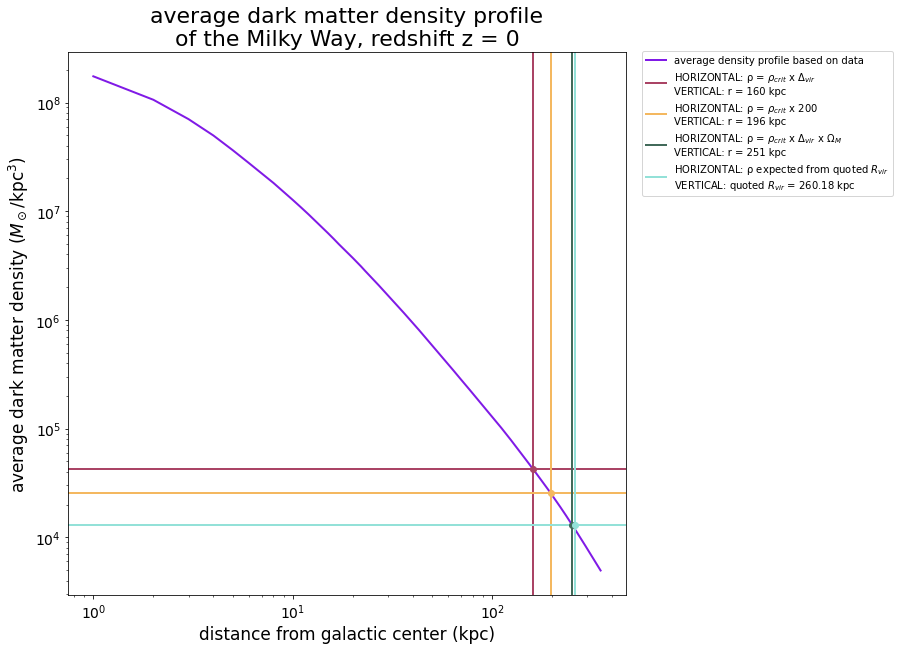

In [6]:
# virial mass mentioned by Ekta: 961482460000.0 M_Sun

TNG_Mvir = 961482460000.0
TNG_Rvir = 260.18414
TNG_mass_per_particle = 8.9e6

halo6 = NFW_Z(TNG_Mvir, "TNG")
print(halo6.r_vir(0))
rho_crit = halo6.rho_crit(0)
delta_vir = halo6.delta_vir(0)
rho_delta = rho_crit * delta_vir
rho_delta_omega = rho_crit * delta_vir * halo6.OmegaM_Z(0)

redshift_7 = AvDensProf(TNG_Mvir, "TNG")

redshift_7.final_plot(starting_radius, bin_size, r_MilkyWay, rad_array_MilkyWay, TNG_Mvir, \
                   TNG_Rvir, rho_crit, delta_vir, rho_delta, rho_delta_omega, TNG_mass_per_particle)

# now: make a final plot function specifically for the Milky Way
# make a separate vertical line for TNG_Rvir
# the horizontal line would be TNG_Mvir / ((4/3) x np.pi x TNG_Rvir^3) - which is the average density to expect from TNG_Rvir